In [1]:
#https://www.kaggle.com/datasets/nikdavis/steam-store-games?select=steam_support_info.csv

#Failide lugemiseks Colabis
import os
from google.colab import drive
colab = False
if colab: 
  drive.mount('/content/drive')
  os.chdir('/content/drive/My Drive/Colab Notebooks/data/csvs')
else:
  


Mounted at /content/drive


In [ ]:
#https://www.kaggle.com/datasets/nikdavis/steam-store-games?select=steam_support_info.csv

#Failide lugemiseks Colabis
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/data/csvs')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import copy
from sklearn.metrics import mean_squared_error, accuracy_score, average_precision_score
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
steamdata = pd.read_csv("steam.csv")
#steamspydata  = pd.read_csv("steamspy_tag_data.csv")

In [ ]:
#steamdata.sort_values("positive_ratings", ascending=False).head(50)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
25,730,Counter-Strike: Global Offensive,2012-08-21,1,Valve;Hidden Path Entertainment,Valve,windows;mac;linux,0,Multi-player;Steam Achievements;Full controlle...,Action;Free to Play,FPS;Multiplayer;Shooter,167,2644404,402313,22494,6502,50000000-100000000,0.00
22,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,863507,142079,23944,801,100000000-200000000,0.00
19,440,Team Fortress 2,2007-10-10,1,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Free to Play,Free to Play;Multiplayer;FPS,520,515879,34036,8495,623,20000000-50000000,0.00
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,1,PUBG Corporation,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,Survival;Shooter;Multiplayer,37,496184,487076,22938,12434,50000000-100000000,26.99
121,4000,Garry's Mod,2006-11-29,1,Facepunch Studios,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,29,363721,16433,12422,1875,10000000-20000000,6.99
2478,271590,Grand Theft Auto V,2015-04-13,1,Rockstar North,Rockstar Games,windows,18,Single-player;Multi-player;Steam Achievements;...,Action;Adventure,Open World;Action;Multiplayer,77,329061,139308,9837,4834,10000000-20000000,24.99
1467,218620,PAYDAY 2,2013-08-13,1,OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,windows;linux,18,Single-player;Multi-player;Co-op;Online Co-op;...,Action;RPG,Co-op;Action;FPS,1130,308657,56523,3975,890,10000000-20000000,7.49
3362,304930,Unturned,2017-07-07,1,Smartly Dressed Games,Smartly Dressed Games,windows;mac;linux,0,Single-player;Online Multi-Player;Online Co-op...,Action;Adventure;Casual;Free to Play;Indie,Free to Play;Survival;Zombies,46,292574,31482,3248,413,20000000-50000000,0.00
1120,105600,Terraria,2011-05-16,1,Re-Logic,Re-Logic,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action;Adventure;Indie;RPG,Sandbox;Adventure;Survival,88,255600,7797,5585,1840,5000000-10000000,6.99
21,550,Left 4 Dead 2,2009-11-19,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Steam Achieve...,Action,Zombies;Co-op;FPS,70,251789,8418,1615,566,10000000-20000000,7.19


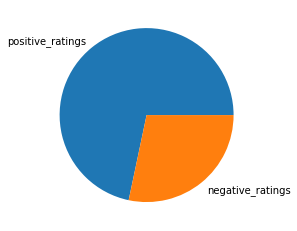

In [13]:
# visualize average rating when a game is either single or multiplayer
multirating = [0,0]
singlerating = [0,0]
bothrating = [0,0]
for index, row in steamdata.iterrows():
    if "Multi-player" in row['categories'] and "Single-player" in row['categories']:
      # += one entry
      bothrating[0] += 1
      # += percent of positive ratings on entry
      bothrating[1] += row['positive_ratings'] / (row['positive_ratings'] + row['negative_ratings'])
    elif "Multi-player" in row['categories']:
      multirating[0] += 1
      multirating[1] += row['positive_ratings'] / (row['positive_ratings'] + row['negative_ratings'])
    elif "Single-player" in row['categories']:
      singlerating[0] += 1
      singlerating[1] += row['positive_ratings'] / (row['positive_ratings'] + row['negative_ratings'])

#calculate percentage
singletemp = [singlerating[1] / singlerating[0], 1 - singlerating[1] / singlerating[0]]
multitemp = [multirating[1] / multirating[0], 1 - multirating[1] / multirating[0]]
bothtemp = [bothrating[1] / bothrating[0], 1 - bothrating[1] / bothrating[0]]

labels = ["positive_ratings", "negative_ratings"]
#plot bothrating piechart
plt.pie(bothtemp, labels = labels)
plt.show()

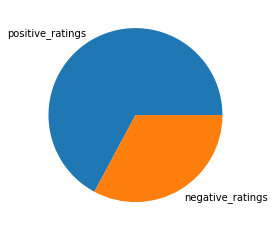

In [14]:
#multiplayer games ratings
plt.pie(multitemp, labels = labels)
plt.show()

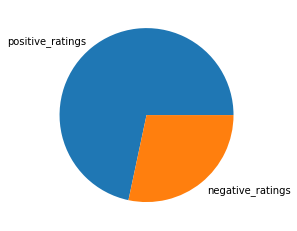

In [15]:
#singleplayer games rating
plt.pie(singletemp, labels = labels)
plt.show()

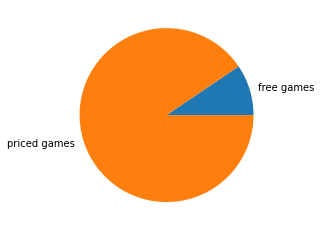

In [16]:
#how many games are free
total = len(steamdata)
free = 0
for index, row in steamdata.iterrows():
  if row['price'] == 0:
    free += 1
percentag = [free/total, 1 - free/total]
plt.pie(percentag, labels = ['free games', 'priced games'])
plt.show()

achievements              9821
average_playtime           0.0
name                LOGistICAL
Name: 12604, dtype: object
achievements                                  0
average_playtime                        3177.08
name                The Abbey of Crime Extensum
Name: 9201, dtype: object


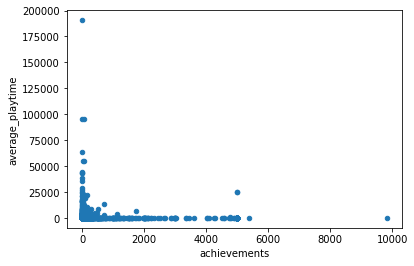

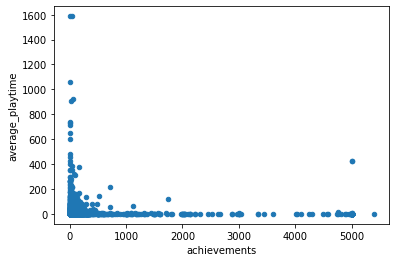

In [ ]:
ax1 = steamdata.plot.scatter(x='achievements',y='average_playtime')
achdf = pd.DataFrame()
achdf['achievements'] = steamdata['achievements']
achdf = achdf.join(steamdata['average_playtime'])
achdf['average_playtime'] = achdf['average_playtime'].div(60).round(2)
achdf = achdf.join(steamdata['name'])
print(achdf.loc[achdf['achievements'].idxmax()])
print(achdf.loc[achdf['average_playtime'].idxmax()])
achdf = achdf.drop(achdf['achievements'].idxmax())
achdf = achdf.drop(achdf['average_playtime'].idxmax())
ax2 = achdf.plot.scatter(x='achievements',y='average_playtime')

In [ ]:
modeldf = steamdata['steamspy_tags'].str.get_dummies(';')
modeldf = modeldf.join(steamdata['achievements'])
modeldf = modeldf.join(steamdata['average_playtime'])
modeldf = modeldf.join(steamdata['name'])
modeldf = sklearn.utils.shuffle(modeldf, random_state=40)

# Mille põhjal ennustada
tunnused = []
for col in modeldf.columns:
  tunnused.append(col)
tunnused.remove('average_playtime')
tunnused.remove('name')
# Mida ennustada
ennustatav = 'average_playtime'

train, test = train_test_split(modeldf)
X_train = train[tunnused]
y_train = train[ennustatav]

X_test = test[tunnused]
y_test = test[ennustatav]

from sklearn.tree import DecisionTreeClassifier

mudel = DecisionTreeClassifier()
mudel.fit(X_train, y_train)
y_pred = mudel.predict(X_train)
print("Täpsus treeninghulgal:",accuracy_score(y_train,y_pred))

y_pred = mudel.predict(X_test)

Täpsus treeninghulgal: 0.8988968777701172


In [ ]:
# Võime võrrelda saadud tulemusi õigete vastustega
print("õige\tennustatud")
print()
for paar in list(zip(y_test,y_pred, test['name'])):
    print(paar[0],"\t",paar[1], "\t", paar[2])
print("Täpsus testhulgal:",accuracy_score(y_test,y_pred))

Streaming output truncated to the last 5000 lines.
8 	 0 	 A Raven Monologue
340 	 596 	 Dead Rising 4
0 	 0 	 BLOCKADE Classic
11 	 209 	 Mini Guns - Omega Wars
0 	 0 	 Die for Valhalla!
0 	 0 	 Idle Racing GO: Clicker Tycoon
85 	 91 	 Ratz Instagib
0 	 0 	 Ninja Stealth 3
0 	 0 	 Drift King: Survival
0 	 0 	 NAL Is Alive
0 	 204 	 Factory Hiro
0 	 0 	 Deployment
0 	 0 	 BALL!
0 	 0 	 The Orchard of Stray Sheep
0 	 0 	 Shadows of Kurgansk
0 	 0 	 Dinosis Survival
0 	 0 	 A Show of Kindness
0 	 0 	 March of the Eagles
0 	 0 	 VolChaos
341 	 0 	 Dustwind
0 	 0 	 LOGistICAL: British Isles
0 	 0 	 Nancy Drew®: Sea of Darkness
88 	 0 	 Simutrans
0 	 0 	 Vrideo
0 	 0 	 Airship Dragoon
0 	 0 	 Abyss: The Wraiths of Eden
0 	 0 	 Vortex Rush
0 	 0 	 Distant Star: Revenant Fleet
0 	 0 	 12 Labours of Hercules VI: Race for Olympus (Platinum Edition)
0 	 0 	 13 Cycles
0 	 0 	 Epic Roller Coasters
0 	 0 	 Planetbound
0 	 0 	 IMM Defense
0 	 0 	 Drugs to Bee
0 	 0 	 Victory and Glory: Napoleon
0 	 